In [1]:
import pandas as pd
import statistics as st
cars=pd.read_csv('DS1_C5_S1_Descriptive_Analysis_Practice_Car_Data.csv')
cars

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# TASK 1

In [2]:
cars=cars.dropna(subset=['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre'])
print(cars)

      Sl. No.        Make      Model        Variant  Displacement  Cylinders  \
0           0        Tata  Nano Genx             Xt         624.0        2.0   
1           1        Tata  Nano Genx             Xe         624.0        2.0   
3           3        Tata  Nano Genx            Xta         624.0        2.0   
4           4        Tata  Nano Genx             Xm         624.0        2.0   
5           5        Tata  Nano Genx            Xma         624.0        2.0   
...       ...         ...        ...            ...           ...        ...   
1271     1271       Honda       City   Vx Mt Diesel        1498.0        4.0   
1272     1272       Honda       City   Zx Mt Diesel        1498.0        4.0   
1273     1273       Honda       City  Zx Cvt Petrol        1497.0        4.0   
1274     1274       Honda       City   V Cvt Petrol        1497.0        4.0   
1275     1275  Mitsubishi    Montero         3.2 At        3200.0        4.0   

      Valves_Per_Cylinder              

In [23]:
#cars1=cars.groupby(by='Make')['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']
Makers=cars.Make.unique()
print(Makers)
factors=['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']
print(factors)
row_head=['mean','median','standard deviation','co-eff of variance']
print(row_head)

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Premier' 'Toyota' 'Nissan'
 'Hyundai' 'Volkswagen' 'Mahindra' 'Fiat' 'Honda' 'Isuzu' 'Skoda' 'Audi'
 nan 'Dc' 'Mini' 'Jaguar' 'Bmw' 'Ford' 'Jeep' 'Porsche' 'Lexus' 'Maserati'
 'Bentley' 'Ferrari' 'Aston Martin' 'Icml' 'Force' 'Volvo'
 'Land Rover Rover' 'Lamborghini' 'Mitsubishi']
['Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Minimum_Turning_Radius']
['mean', 'median', 'standard deviation', 'co-eff of variance']


In [21]:
def measures(i):
    print('For ',i)
    cars1=cars[cars.Make==i]
    mean=[]
    median=[]
    stan_dev=[]
    cv=[]
    for x in factors:
        col_mean=cars1.loc[:,x].mean()
        mean.append(col_mean)
        median.append(cars1.loc[:,x].median())
        col_sd=cars1.loc[:,x].std()
        stan_dev.append(col_sd)
        cv.append(col_sd/col_mean*100)
    m_data=pd.DataFrame([mean,median,stan_dev,cv], columns=factors)
    m_data.insert(0, 'Measures', row_head, True)
    print(m_data)   

In [22]:
for y in Makers:
    measures(y)

For  Tata
             Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                mean   1338.913043                 42.673913   
1              median   1199.000000                 44.000000   
2  standard deviation    457.601079                 11.250786   
3  co-eff of variance     34.177057                 26.364553   

   City_Mileage_km_litre  Highway_Mileage_km_litre  Minimum_Turning_Radius  
0              19.461087                 20.432258                5.308140  
1              19.200000                 23.000000                5.100000  
2               4.655082                  3.371685                1.305844  
3              23.919948                 16.501773               24.600794  
For  Datsun
             Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                mean   1020.666667                 31.888889   
1              median   1198.000000                 35.000000   
2  standard deviation    210.291464                  3.689324   
3  co-e

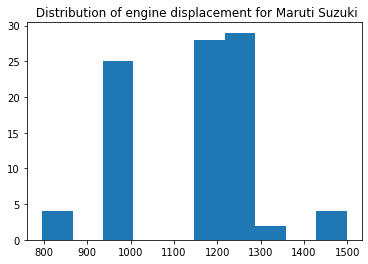

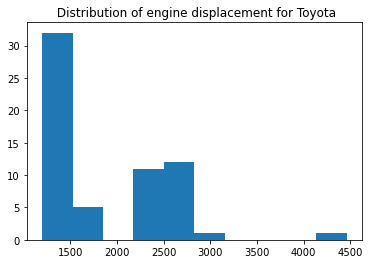

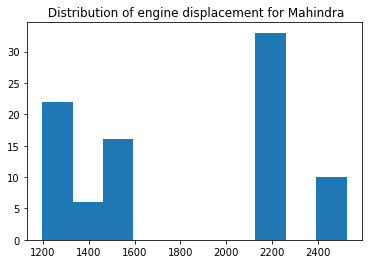

In [34]:
import matplotlib.pyplot as plt
Makers1=['Maruti Suzuki','Toyota','Mahindra']
for x in Makers1:
    cars2=cars[cars.Make==x]
    plt.hist(cars2['Displacement'])
    plt.title(' Distribution of engine displacement for %s'%x)
    plt.show()
    

## Conclusion: The displacement for Maruti Suzuki is least spread (i.e. between 800 to 1500cc) whereas the engine displacement for Toyota is most spread (i.e. between 1000-4500cc).

# TASK 2

### To draw the correlation graph of mileage of a car, we consider the following factors:
1. Engine Displacement
2. Fuel Tank Capacity
3. Cylinders

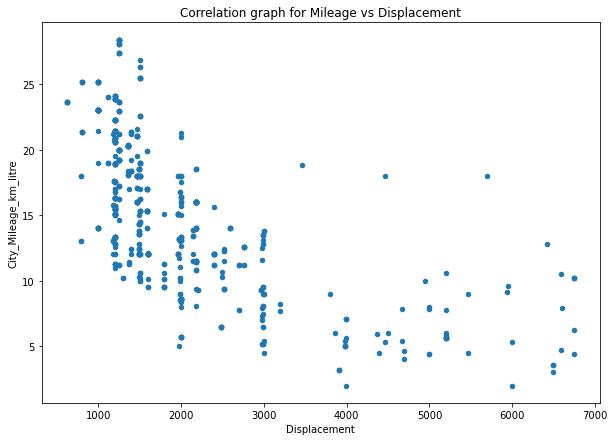

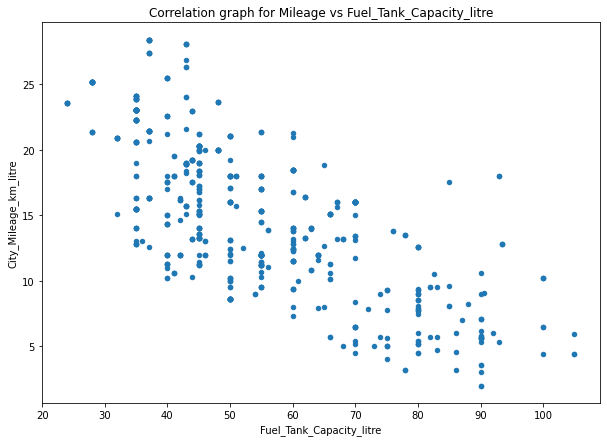

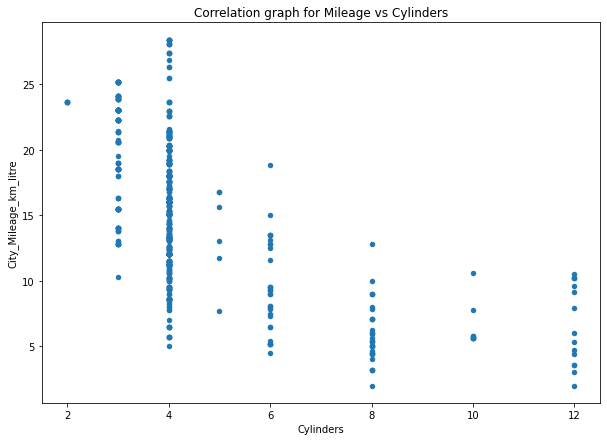

In [39]:
# Plotting the correlation graph
factors1=['Displacement','Fuel_Tank_Capacity_litre','Cylinders']
for i in factors1:
    cars.plot.scatter(i,'City_Mileage_km_litre', figsize=(10,7))
    plt.title('Correlation graph for Mileage vs %s'%i)
    plt.show()

In [44]:
# Calculating the correlation coefficient for each pair.
corr1= cars['City_Mileage_km_litre'].corr(cars['Displacement'])
corr2= cars['City_Mileage_km_litre'].corr(cars['Fuel_Tank_Capacity_litre'])
corr3= cars['City_Mileage_km_litre'].corr(cars['Cylinders'])
print('The correlation coefficient Displacement and Mileage is %1.2f'%corr1)
print('The correlation coefficient Fuel Tank Capacity and Mileage is %1.2f'%corr2)
print('The correlation coefficient Number of Cylinders and Mileage is %1.2f'%corr3)

The correlation coefficient Displacement and Mileage is -0.64
The correlation coefficient Fuel Tank Capacity and Mileage is -0.70
The correlation coefficient Number of Cylinders and Mileage is -0.57


## Conclusion: All the choosen factors show a negative correlation. Therefore we can conclude that the mileage of a car is inversely proportional to the factor like engine displacement, fuel tank capacity and number of cylinders.